# Galaxy Bank Project (Visa for Lisa)

This project is about a bank (Galaxy Bank) whose management wants to explore converting some of its deposit customers to become personal loan customers (while retaining them as depositors). In short, they want to upsell customers to purchase more banking products from Galaxy Bank.

The bank has had some previous success in upselling to its deposit clients. Still, unfortunately, not all clients offered a loan by Galaxy Bank accept it and become a loan customers. The bank's campaign last year for its customers showed a healthy loan acceptance conversion rate of over 9%. This data has encouraged the marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

The bank wants to predict better and identify who will accept loans offered to potential loan customers. It will help make their marketing efforts more effective with higher conversion rates.

## Importing Libraries

In [99]:
!pip install seaborn
!pip install scikit-learn

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import learning_curve
import joblib

## Data Collecting / Cleaning

In [101]:
def load_data():
    df = pd.read_csv(r'https://storage.googleapis.com/qwasar-public/track-ds/Visa_For_Lisa_Loan_Modelling.csv', index_col='ID')
    return df
loan_df = load_data()
loan_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [102]:
def data_overview(loan_df):
    print('First 10 Rows: ')
    print(loan_df.head(10))
    print('Size of Data: ')
    print(loan_df.shape)
    print('Data Types: ')
    print(loan_df.dtypes)
    print('Data Information: ')
    print(loan_df.info())
    print('Summary of Null Values: ')
    print(loan_df.isnull().sum())
    print('Summary of Duplicates: ')
    print(loan_df.duplicated().sum())
data_overview(loan_df)

First 10 Rows: 
    Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
ID                                                                          
1    25           1      49     91107       4    1.6          1         0   
2    45          19      34     90089       3    1.5          1         0   
3    39          15      11     94720       1    1.0          1         0   
4    35           9     100     94112       1    2.7          2         0   
5    35           8      45     91330       4    1.0          2         0   
6    37          13      29     92121       4    0.4          2       155   
7    53          27      72     91711       2    1.5          2         0   
8    50          24      22     93943       1    0.3          3         0   
9    35          10      81     90089       3    0.6          2       104   
10   34           9     180     93023       1    8.9          3         0   

    Personal Loan  Securities Account  CD Account  Online  

In [103]:
def data_cleaning(loan_df):
    # Replace Negative Values for Experience with 0
    loan_df.loc[loan_df['Experience'] < 0, 'Experience'] = 0
    # Drop Unncessary ZIP code column
    loan_df.drop(columns='ZIP Code', inplace=True)
    
    loan_df.drop_duplicates()
    loan_df.fillna(0)
    return loan_df
data_cleaning(loan_df)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,
1,25,1,49,4,1.6,1,0,0,1,0,0,0
2,45,19,34,3,1.5,1,0,0,1,0,0,0
3,39,15,11,1,1.0,1,0,0,0,0,0,0
4,35,9,100,1,2.7,2,0,0,0,0,0,0
5,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4996,29,3,40,1,1.9,3,0,0,0,0,1,0
4997,30,4,15,4,0.4,1,85,0,0,0,1,0
4998,63,39,24,2,0.3,3,0,0,0,0,0,0


## Data Exploration / Visualisation

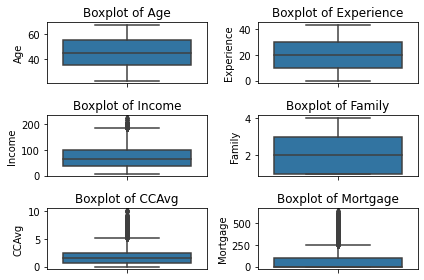

In [104]:
def box_plot(loan_df):
    plt.figure(figsize=(6,4))
    numerical_cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
    for i, col in enumerate(numerical_cols):
        plt.subplot(3, 2, i + 1)
        sns.boxplot(y=col, data=loan_df)
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()
box_plot(loan_df)

In [105]:
def correlation(loan_df):
    return loan_df.corr()
correlation(loan_df)  

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994198,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994198,1.000000,-0.046729,-0.052213,-0.049912,0.013536,-0.010840,-0.007858,-0.001111,0.010046,0.013975,0.008910
Income,-0.055269,-0.046729,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052213,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049912,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013536,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010840,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007858,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001111,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010046,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


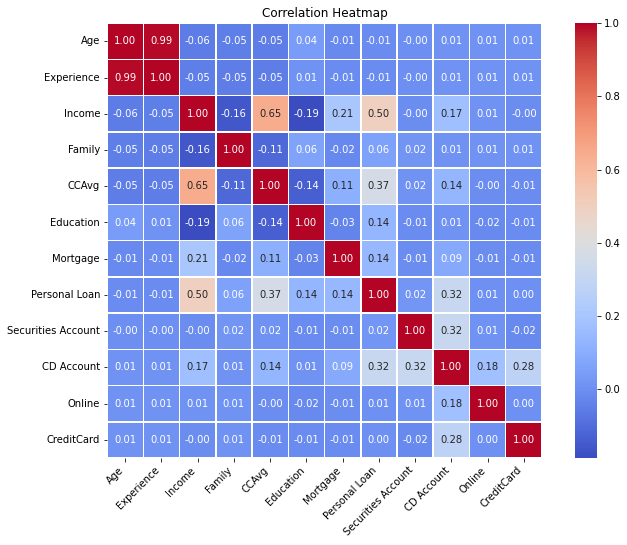

In [106]:
def plot_correlation_matrix(loan_df):
    correlation_matrix = loan_df.corr()
    plt.figure(figsize=(12, 8)) 
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
    plt.title('Correlation Heatmap')
    plt.xticks(rotation=45, ha='right')
    plt.show()
plot_correlation_matrix(loan_df)

Loan Acceptance Rate: 9.6%.


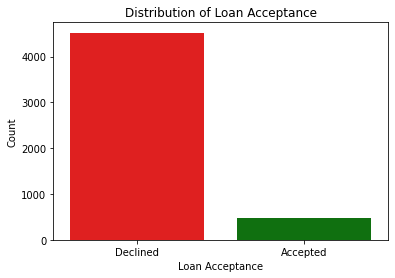

In [107]:
def loan_acceptance(loan_df):
    acceptance_rate = loan_df['Personal Loan'].mean() * 100
    print(f'Loan Acceptance Rate: {acceptance_rate}%.')
    
    plt.figure(figsize=(6,4))
    sns.countplot(x=loan_df['Personal Loan'], palette=['red', 'green'])
    plt.xticks([0, 1], ['Declined', 'Accepted'])
    plt.xlabel("Loan Acceptance")
    plt.ylabel("Count")
    plt.title("Distribution of Loan Acceptance")
    plt.show()
loan_acceptance(loan_df)

## Machine Learning (Logistic Regression)

In [108]:
# data preprocessing
numerical_cols = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']
scaler = StandardScaler()
loan_df[numerical_cols] = scaler.fit_transform(loan_df[numerical_cols])

In [109]:
# model training
X = loan_df.drop(columns=['Personal Loan'])
y = loan_df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Logistic Regression for Classification
model = LogisticRegression(max_iter=800)
model.fit(X_train, y_train)

LogisticRegression(max_iter=800)

In [110]:
# model evaluation
y_pred = model.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy Score:  0.954
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       895
           1       0.86      0.68      0.76       105

    accuracy                           0.95      1000
   macro avg       0.91      0.83      0.86      1000
weighted avg       0.95      0.95      0.95      1000

[[883  12]
 [ 34  71]]


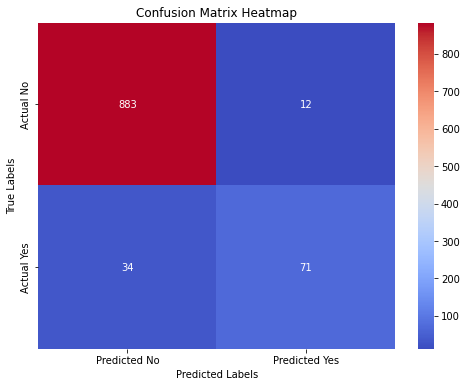

In [111]:
# confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

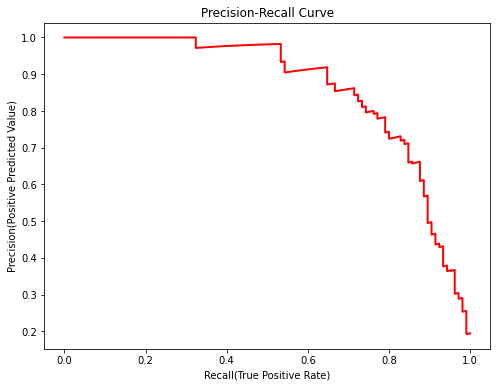

In [112]:
# precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='red', lw=2)
plt.xlabel('Recall(True Positive Rate)')
plt.ylabel('Precision(Positive Predicted Value)')
plt.title('Precision-Recall Curve')
plt.show()

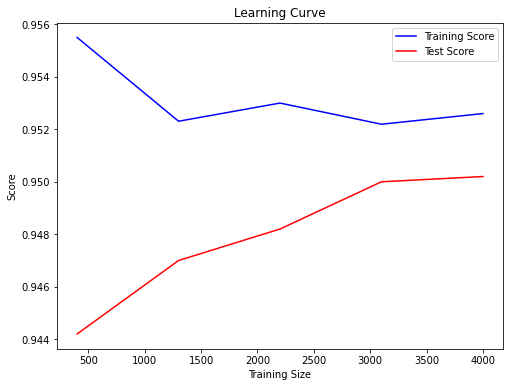

In [113]:
# learning curve to check underfitting or overfitting
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training Score", color="blue")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Test Score", color="red")
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

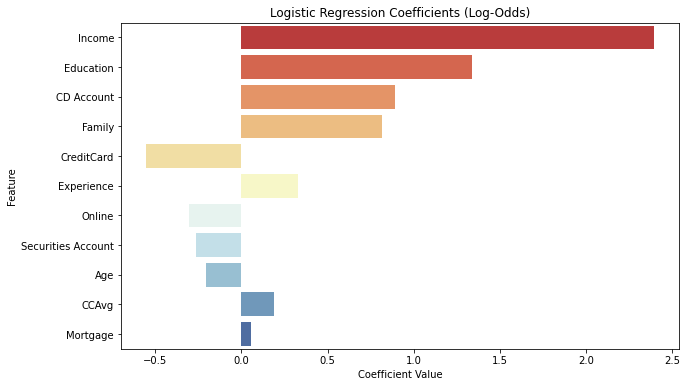

,Feature,Coefficient,Abs Coefficient,Odds Ratio
2,Income,2.393954,2.393954,10.956734
5,Education,1.336354,1.336354,3.805144
8,CD Account,0.894254,0.894254,2.445511
3,Family,0.816080,0.816080,2.261618
10,CreditCard,-0.551783,0.551783,0.575922
1,Experience,0.331003,0.331003,1.392363
9,Online,-0.303312,0.303312,0.738369
7,Securities Account,-0.263974,0.263974,0.767993
0,Age,-0.205013,0.205013,0.814637
4,CCAvg,0.187396,0.187396,1.206105


In [114]:
# finding log-odds of features
coefs = model.coef_[0]
feats = X.columns
coefs_df = pd.DataFrame({'Feature': feats,'Coefficient': coefs})
coefs_df['Abs Coefficient'] = coeff_df['Coefficient'].abs()
odds_ratios = np.exp(coefs)
coefs_df['Odds Ratio'] = odds_ratios
coefs_df_sorted = coefs_df.sort_values(by='Abs Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefs_df_sorted, palette='RdYlBu')
plt.title('Logistic Regression Coefficients (Log-Odds)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()
coefs_df_sorted

## Model for Production

In [115]:
joblib.dump(model, 'Galaxy Bank Loan Prediction Model.pkl')

['Galaxy Bank Loan Prediction Model.pkl']